In [42]:
import pandas as pd

In [47]:
with open('output_dir/seg_vec_coeff_scan_5/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data = [eval(line.strip()) for line in data]

# Create a DataFrame
df = pd.DataFrame(data)


<AxesSubplot:>

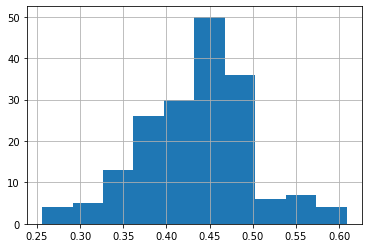

In [38]:
df[df["lambda"]==1.75]['segmentation_iou'].hist()

In [34]:
import numpy as np

np.array(avg_iou.index)

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

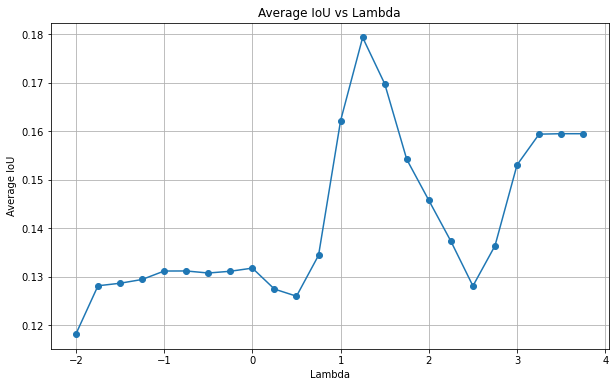

In [48]:
import matplotlib.pyplot as plt

avg_iou = df.groupby("lambda")["segmentation_iou"].mean()
plt.figure(figsize=(10, 6))
plt.plot(np.array(avg_iou.index), avg_iou.values, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Average IoU')
plt.title('Average IoU vs Lambda')
plt.grid(True)




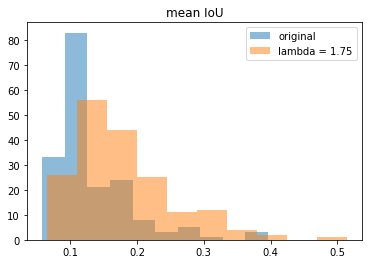

In [49]:

import matplotlib.pyplot as plt
plt.title("mean IoU")
plt.hist(df[df["lambda"]==0]['segmentation_iou'], alpha=0.5, label='original')
plt.hist(df[df["lambda"]==1.25]['segmentation_iou'], alpha=0.5, label='lambda = 1.75')
plt.legend(loc='upper right')
plt.show()





<AxesSubplot:>

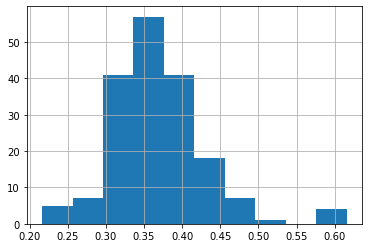

In [11]:
df["segmentation_iou"].hist()

In [80]:
with open('output_dir/base1/log.txt', 'r') as file:
    data = file.readlines()

# Convert each line from string to dictionary
data = [eval(line.strip()) for line in data]

# Create a DataFrame
df = pd.DataFrame(data)

df_unique = df.drop_duplicates(subset=["query_name", "support_name"])

# Group by 'query_name' and find the one with the lowest average 'iou'
df2 = df_unique[df_unique['iou'] >= 0.2]
grouped_query = df2.groupby('query_name')['iou'].mean()
filtered_query_names = grouped_query[grouped_query >= 0.6].index
filtered_df = df2[df2['query_name'].isin(filtered_query_names)]

# Group by 'support_name' and find the one with the lowest average 'iou'
grouped_support = filtered_df.groupby('support_name')['iou'].mean()
filtered_both_names = grouped_support[grouped_support >= 0.6].index
both_filtered_df = filtered_df[filtered_df['support_name'].isin(filtered_both_names)]


In [81]:
with open('output_dir/multi_pass/log.txt', 'r') as file:
    data2 = file.readlines()

# Convert each line from string to dictionary
data2 = [eval(line.strip()) for line in data2]

df_multi = pd.DataFrame(data2)

In [82]:
df_multi[df_multi["support_name"].isin(both_filtered_df["support_name"])]

,query_name,support_name,segmentation_iou,colorization_mse,bw_mse,neutral_copy_mse,inpaint_black_mse,inpaint_white_mse,lowlight_mse
0,2007_000033,2011_002515,0.646447,0.482051,0.382694,0.334660,0.427270,0.470124,0.594962
1,2007_000061,2009_003080,0.169599,0.240414,0.271365,0.259541,0.262019,0.916627,0.351353
3,2007_000346,2008_002775,0.419836,0.580908,0.596427,0.492930,0.612987,2.806064,0.608037
4,2007_000529,2008_001040,0.000000,0.387258,0.287217,0.303370,0.286978,0.523840,0.351481
5,2007_000559,2010_005496,0.000273,0.802558,0.611293,0.581877,0.782396,1.532250,1.011638
...,...,...,...,...,...,...,...,...,...
4994,2009_001108,2011_002295,0.357285,0.552364,0.203771,0.130769,0.163658,3.260161,0.637539
4995,2009_001160,2010_003771,0.312925,0.608646,0.598040,0.317253,0.424614,0.569236,0.386566
4997,2009_001278,2009_002856,0.000000,0.700278,0.547202,0.570241,0.579178,3.768245,0.651298
4998,2009_001314,2009_004895,0.624346,0.618287,0.248800,0.090045,0.254124,3.851539,1.060767


In [83]:
# Group by 'query_name' and find the one with the lowest average 'iou'
df2 = df_multi[df_multi['segmentation_iou'] >= 0.2]
grouped_query = df2.groupby('query_name')['segmentation_iou'].mean()
filtered_query_names = grouped_query[grouped_query >= 0.6].index
filtered_df = df2[df2['query_name'].isin(filtered_query_names)]

# Group by 'support_name' and find the one with the lowest average 'iou'
grouped_support = filtered_df.groupby('support_name')['segmentation_iou'].mean()
filtered_both_names = grouped_support[grouped_support >= 0.6].index
both_filtered_df = filtered_df[filtered_df['support_name'].isin(filtered_both_names)]


In [108]:
new_df = both_filtered_df[both_filtered_df['segmentation_iou'] >= 0.5]

In [109]:
grouped_support = new_df.groupby('support_name')['inpaint_black_mse'].mean()
filtered_both_names = grouped_support[grouped_support <= 0.5].index
new_df = new_df[new_df['support_name'].isin(filtered_both_names)]

In [111]:
grouped_support = new_df.groupby('support_name')['colorization_mse'].mean()
filtered_both_names = grouped_support[grouped_support <= 0.5].index
new_df = new_df[new_df['support_name'].isin(filtered_both_names)]

In [115]:
grouped_support = new_df.groupby('support_name')['lowlight_mse'].mean()
filtered_both_names = grouped_support[grouped_support <= 0.5].index
new_df = new_df[new_df['support_name'].isin(filtered_both_names)]

In [132]:
filtered_df_sorted = new_df.sort_values(by=['support_name', 'segmentation_iou'], ascending=[True, False])
df_filtered = filtered_df_sorted.drop_duplicates(subset='support_name', keep='first')

filtered_df_sorted2 = df_filtered.sort_values(by=['query_name', 'segmentation_iou'], ascending=[True, False])
df_filtered = filtered_df_sorted2.drop_duplicates(subset='query_name', keep='first')

In [136]:
list_of_dicts = new_df[['query_name', 'support_name']].to_dict('records')

In [137]:
import json

with open('top_multitask_pairings2.json', 'w') as file:
    json.dump(list_of_dicts, file, indent=4)